In [87]:
import pandas as pd

transport_df = pd.read_csv(r'C:\Users\Gareth.Ahern\Desktop\LinRegTesting.csv')
transport_df.head()

,max_speed,max_altitude,environment,transport
0,6,8,3,Plane
1,10,9,3,Plane
2,7,6,2,Plane
3,7,7,0,Plane
4,7,7,1,Plane


In [88]:
transport_df.describe()

,max_speed,max_altitude,environment
count,61.000000,61.000000,61.000000
mean,5.229508,3.508197,4.934426
std,2.824851,3.253833,2.971357
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,3.000000
50%,6.000000,2.000000,5.000000
75%,7.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

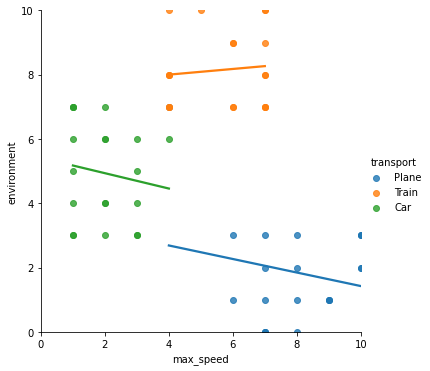

In [90]:
sns.lmplot(x='max_speed', y='environment', data=transport_df, ci=None, hue='transport');
plt.xlim(0, 10);
plt.ylim(0, 10);

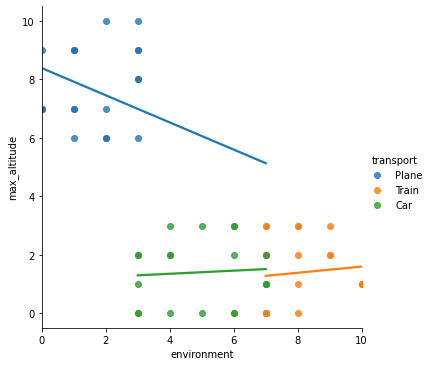

In [91]:
sns.lmplot(x='environment', y='max_altitude', data=transport_df, ci=None, hue='transport');

In [92]:
dummy_df = transport_df
dummy_df['tran'] = dummy_df['transport']
dummy_df =pd.get_dummies(transport_df,columns=['tran'])
dummy_df.head()

,max_speed,max_altitude,environment,transport,tran_Car,tran_Plane,tran_Train
0,6,8,3,Plane,0,1,0
1,10,9,3,Plane,0,1,0
2,7,6,2,Plane,0,1,0
3,7,7,0,Plane,0,1,0
4,7,7,1,Plane,0,1,0


In [93]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['environment','max_altitude','max_speed']
X = dummy_df[feature_cols]
y = dummy_df.tran_Car

logreg.fit(X,y)
pred = logreg.predict(X)
logreg.predict_proba(X)[0:10]

array([[9.91049134e-01, 8.95086639e-03],
       [9.99995793e-01, 4.20692122e-06],
       [9.90586695e-01, 9.41330468e-03],
       [9.66889766e-01, 3.31102335e-02],
       [9.86027989e-01, 1.39720107e-02],
       [9.32606538e-01, 6.73934624e-02],
       [9.99509493e-01, 4.90506985e-04],
       [9.57314688e-01, 4.26853121e-02],
       [9.99796973e-01, 2.03027317e-04],
       [9.87553913e-01, 1.24460871e-02]])

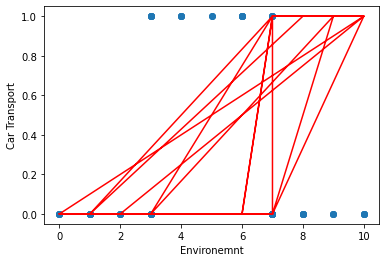

NameError: name 'mammals' is not defined

In [100]:
plt.scatter(dummy_df.environment, dummy_df.tran_Car)
plt.plot(dummy_df.environment, pred, color='red')
plt.xlabel('Environemnt')
plt.ylabel('Car Transport')
plt.show()

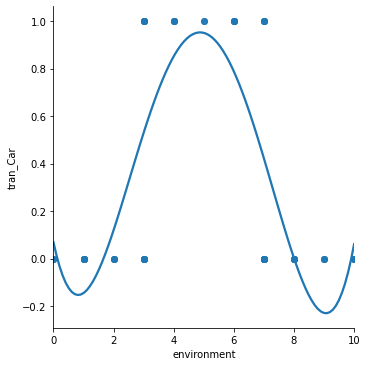

In [105]:
sns.lmplot(x='environment', y='tran_Car', data=dummy_df, ci=None, order=5);

In [95]:
dummy_df['car_pred_prob'] = logreg.predict_proba(X)[:, 1]
dummy_df.head()

,max_speed,max_altitude,environment,transport,tran_Car,tran_Plane,tran_Train,car_pred_prob
0,6,8,3,Plane,0,1,0,0.008951
1,10,9,3,Plane,0,1,0,0.000004
2,7,6,2,Plane,0,1,0,0.009413
3,7,7,0,Plane,0,1,0,0.033110
4,7,7,1,Plane,0,1,0,0.013972


In [96]:
logreg = LogisticRegression()

feature_cols = ['environment','max_altitude','max_speed']
X = dummy_df[feature_cols]
y = dummy_df.tran_Plane

logreg.fit(X,y)
pred = logreg.predict(X)
dummy_df['plane_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [97]:
logreg = LogisticRegression()

feature_cols = ['environment','max_altitude','max_speed']
X = dummy_df[feature_cols]
y = dummy_df.tran_Train

logreg.fit(X,y)
pred = logreg.predict(X)
dummy_df['train_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [98]:
dummy_df.head()

,max_speed,max_altitude,environment,transport,tran_Car,tran_Plane,tran_Train,car_pred_prob,plane_pred_prob,train_pred_prob
0,6,8,3,Plane,0,1,0,0.008951,0.975837,0.000854
1,10,9,3,Plane,0,1,0,0.000004,0.997697,0.028572
2,7,6,2,Plane,0,1,0,0.009413,0.943339,0.000847
3,7,7,0,Plane,0,1,0,0.033110,0.988197,0.000018
4,7,7,1,Plane,0,1,0,0.013972,0.982634,0.000101


In [99]:
import numpy as np

dummy_df.loc[(dummy_df['car_pred_prob'] > dummy_df['plane_pred_prob']) & (dummy_df['car_pred_prob'] > dummy_df['train_pred_prob']) , 'pred_outcome'] = 'Car' 
dummy_df.loc[(dummy_df['plane_pred_prob'] > dummy_df['car_pred_prob']) & (dummy_df['plane_pred_prob'] > dummy_df['train_pred_prob']) , 'pred_outcome'] = 'Plane' 
dummy_df.loc[(dummy_df['train_pred_prob'] > dummy_df['car_pred_prob']) & (dummy_df['train_pred_prob'] > dummy_df['plane_pred_prob']) , 'pred_outcome'] = 'Train' 
dummy_df

,max_speed,max_altitude,environment,transport,tran_Car,tran_Plane,tran_Train,car_pred_prob,plane_pred_prob,train_pred_prob,pred_outcome
0,6,8,3,Plane,0,1,0,0.008951,0.975837,0.000854,Plane
1,10,9,3,Plane,0,1,0,0.000004,0.997697,0.028572,Plane
2,7,6,2,Plane,0,1,0,0.009413,0.943339,0.000847,Plane
3,7,7,0,Plane,0,1,0,0.033110,0.988197,0.000018,Plane
4,7,7,1,Plane,0,1,0,0.013972,0.982634,0.000101,Plane
...,...,...,...,...,...,...,...,...,...,...,...
56,3,0,6,Car,1,0,0,0.869920,0.005038,0.150043,Car
57,1,1,7,Car,1,0,0,0.984164,0.003624,0.088956,Car
58,1,0,5,Car,1,0,0,0.998303,0.003455,0.004329,Car
59,2,3,6,Car,1,0,0,0.904560,0.040073,0.020826,Car
